In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
sys.path.append('../')
import pylheV

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [96]:
for e in pylheV.readLHE('pp2ttbar_out.lhe'):
    for i in range(int(e.eventinfo.nparticles)):
            if e.particles[i].id == 24:
                daughters =  e.particles[i].daughters
                mother1 = e.particles[i].daughters
                print('daughters =',daughters, 'mom =', i)
                
         
                

daughters = [739, 739] mom = 735
daughters = [751, 752] mom = 739
daughters = [461, 461] mom = 457
daughters = [491, 492] mom = 461
daughters = [666, 667] mom = 659
daughters = [352, 352] mom = 348
daughters = [412, 413] mom = 352
daughters = [1021, 1021] mom = 1017
daughters = [1039, 1040] mom = 1021
daughters = [802, 802] mom = 798
daughters = [826, 827] mom = 802
daughters = [302, 302] mom = 298
daughters = [308, 309] mom = 302
daughters = [209, 209] mom = 205
daughters = [212, 213] mom = 209
daughters = [152, 152] mom = 148
daughters = [182, 183] mom = 152
daughters = [273, 273] mom = 269
daughters = [282, 283] mom = 273


In [115]:
def invariant_mass(file_name, pid):
    invariant_mass = []
    for e in pylheV.readLHE(file_name):
        for i in range(int(e.eventinfo.nparticles)):
            if e.particles[i].id == pid:
                #Getting daughters
                daughters =  e.particles[i].daughters
                
                #Finding the final daughters
                f_daughters = final_daughters(e.particles,daughters)
                
                #Calculating the invariant mass
                energy = 0
                px = 0
                py = 0
                pz = 0
                #Sum component with component of all final daughters
                for j in range(len(f_daughters)):

                    energy = energy + e.particles[f_daughters[j]].e
                    px = px + e.particles[f_daughters[j]].px
                    py = py + e.particles[f_daughters[j]].py
                    pz = pz + e.particles[f_daughters[j]].pz

                inv_mass = np.sqrt(energy**2 - px**2 - py**2 - pz**2)

                invariant_mass.append(inv_mass)
                
    return invariant_mass
                 

In [116]:
def final_daughters(particles,daughters):
    
    #Removing repeated daughters
    d = [] 
    for i in daughters: 
        if i not in d: 
            d.append(i) 
            
   
    daughters = d
    
    #While all of daughtres arent final the function searchs for daughters of no final daughters.
    k = 0
    while(k!=len(daughters)):
        if particles[daughters[k]].status < 0:
            daughters = daughters + particles[daughters[k]].daughters
            daughters.pop(k)
            return final_daughters(particles,daughters)
        
            
        k = k+1
    
    return daughters
            

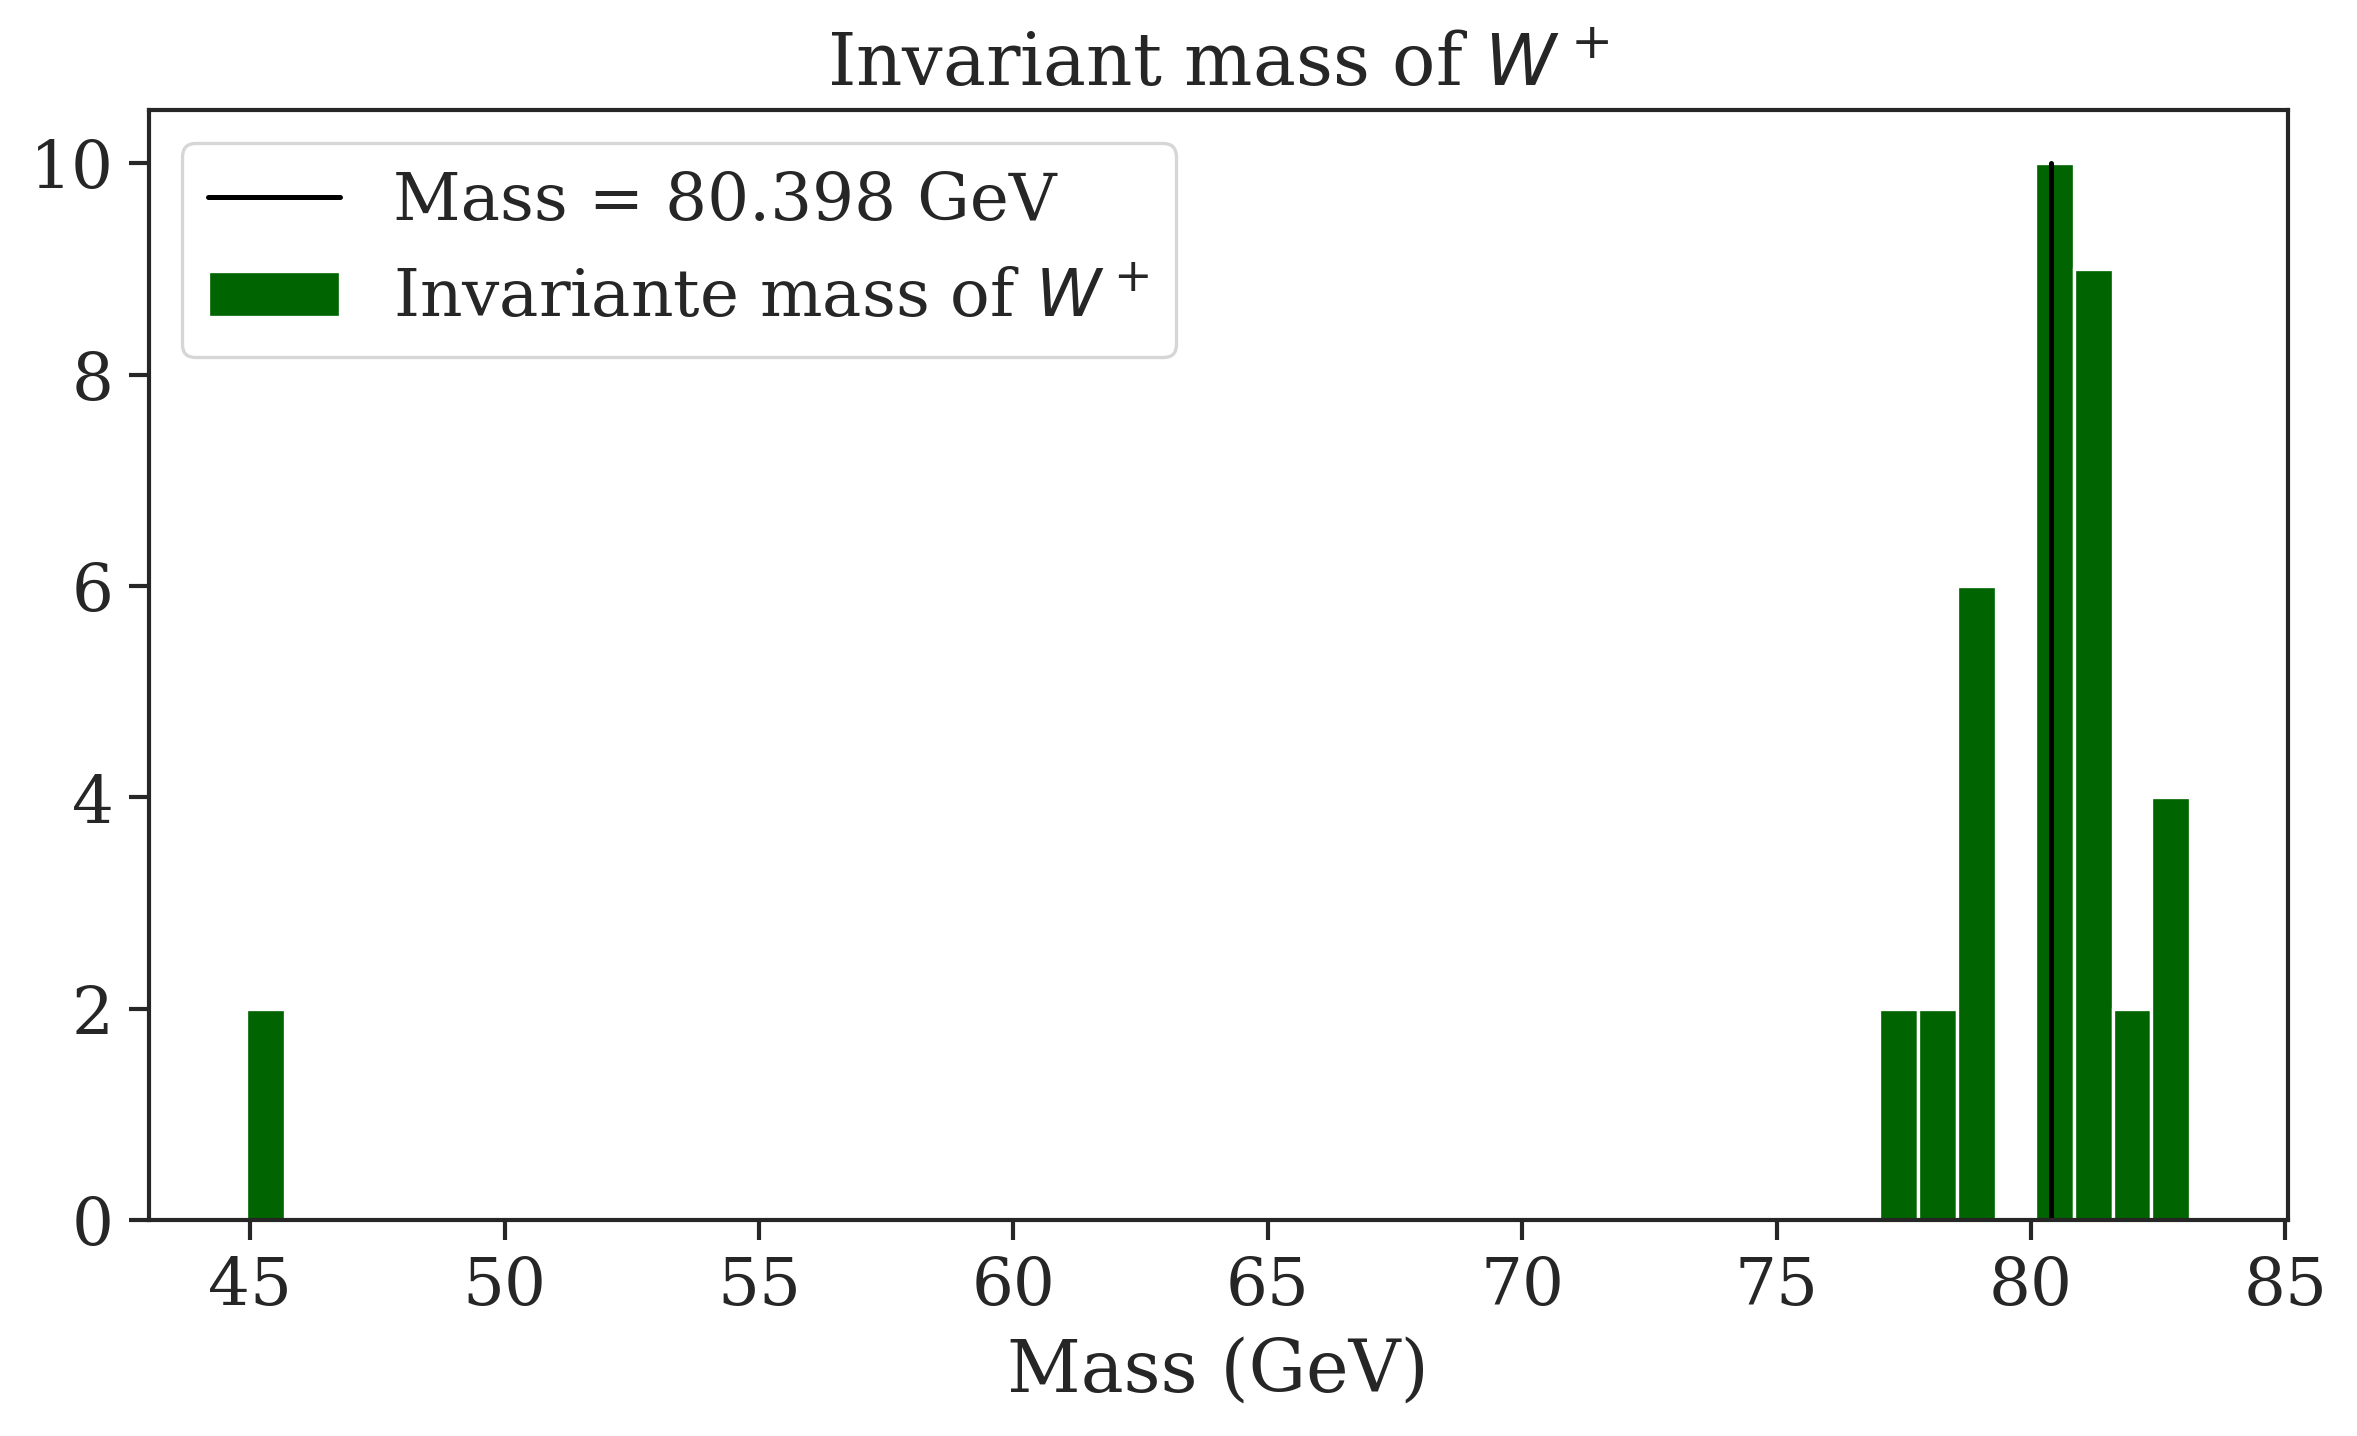

In [170]:
#Invariant mass
w_mass = invariant_mass('pp2ttbar_out.lhe',24)
w_mass = w_mass + invariant_mass('pp2ttbar_out.lhe',-24)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(w_mass, bins = 50, color = 'darkgreen',label =r'Invariante mass of $W^+$')
plt.plot([80.398,80.398],[0,10], color = 'black', label = r'Mass = 80.398 GeV')

plt.xlabel(r'Mass (GeV)')
plt.title(r'Invariant mass of $W^+$')
plt.legend()
plt.show()

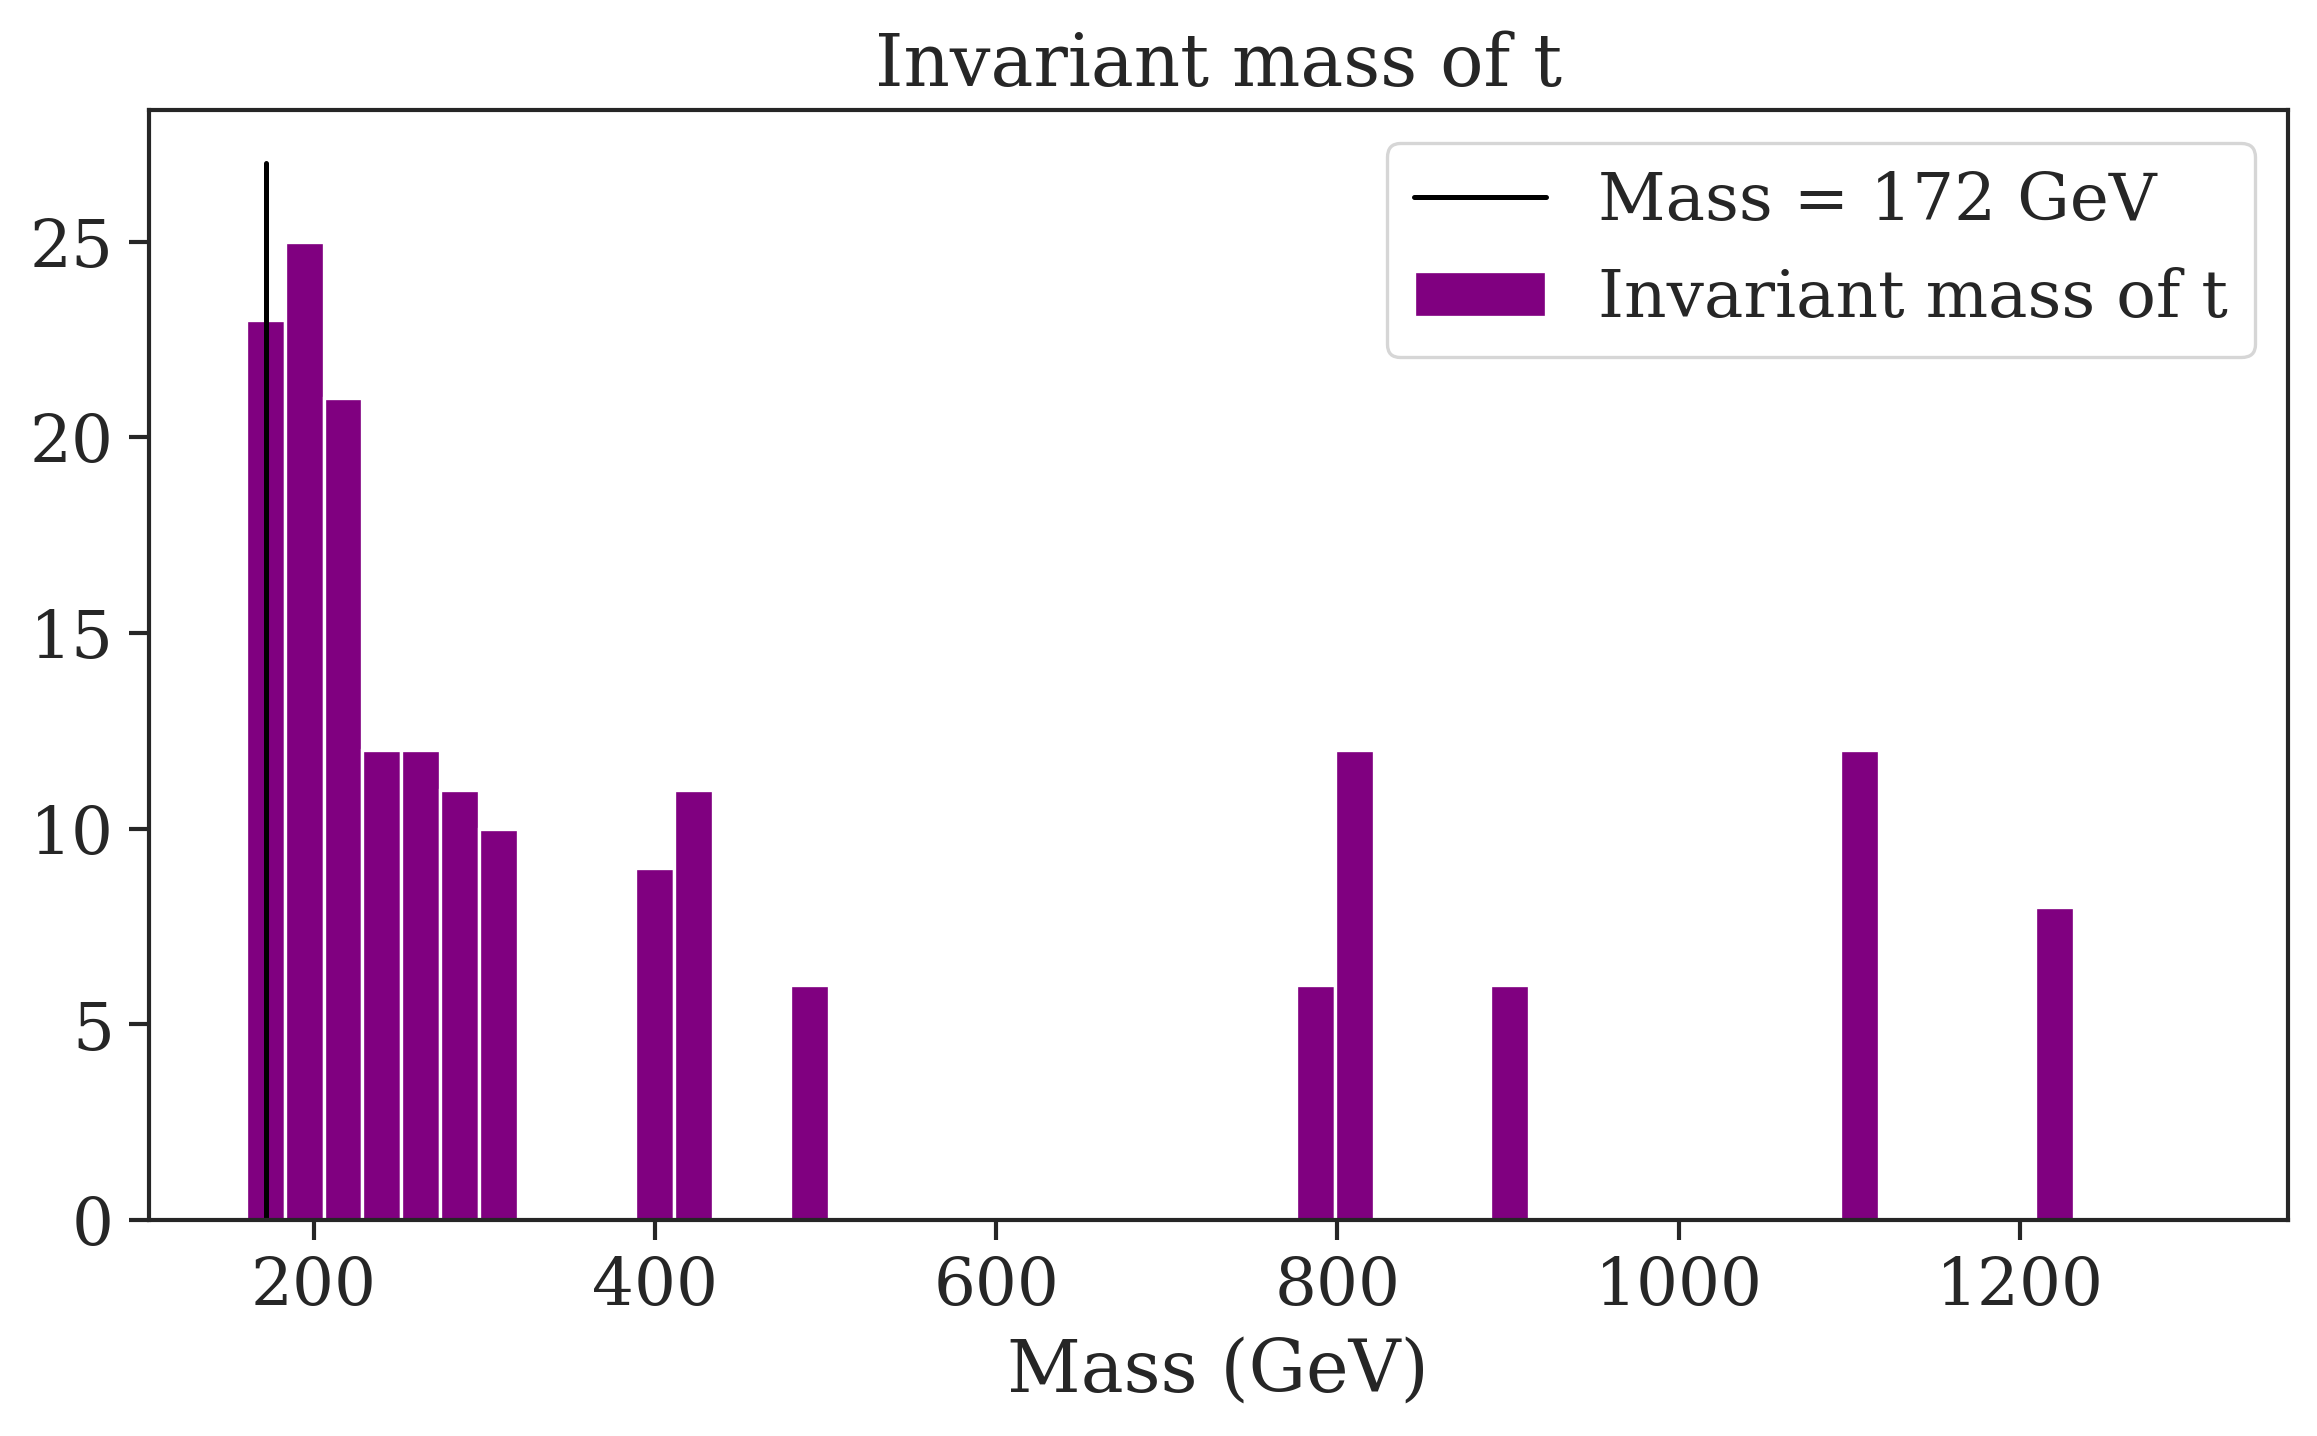

In [161]:
#Invariant mass
t_mass = invariant_mass('pp2ttbar_out.lhe',6)
t_mass = t_mass + invariant_mass('pp2ttbar_out.lhe',-6)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(t_mass, bins = 50, range = [160,1300], color = 'purple', label = 'Invariant mass of t')
plt.plot([172,172],[0,27], color = 'black', label = r'Mass = 172 GeV')

plt.xlabel(r'Mass (GeV)')
plt.title(r'Invariant mass of t')
plt.legend()
plt.show()

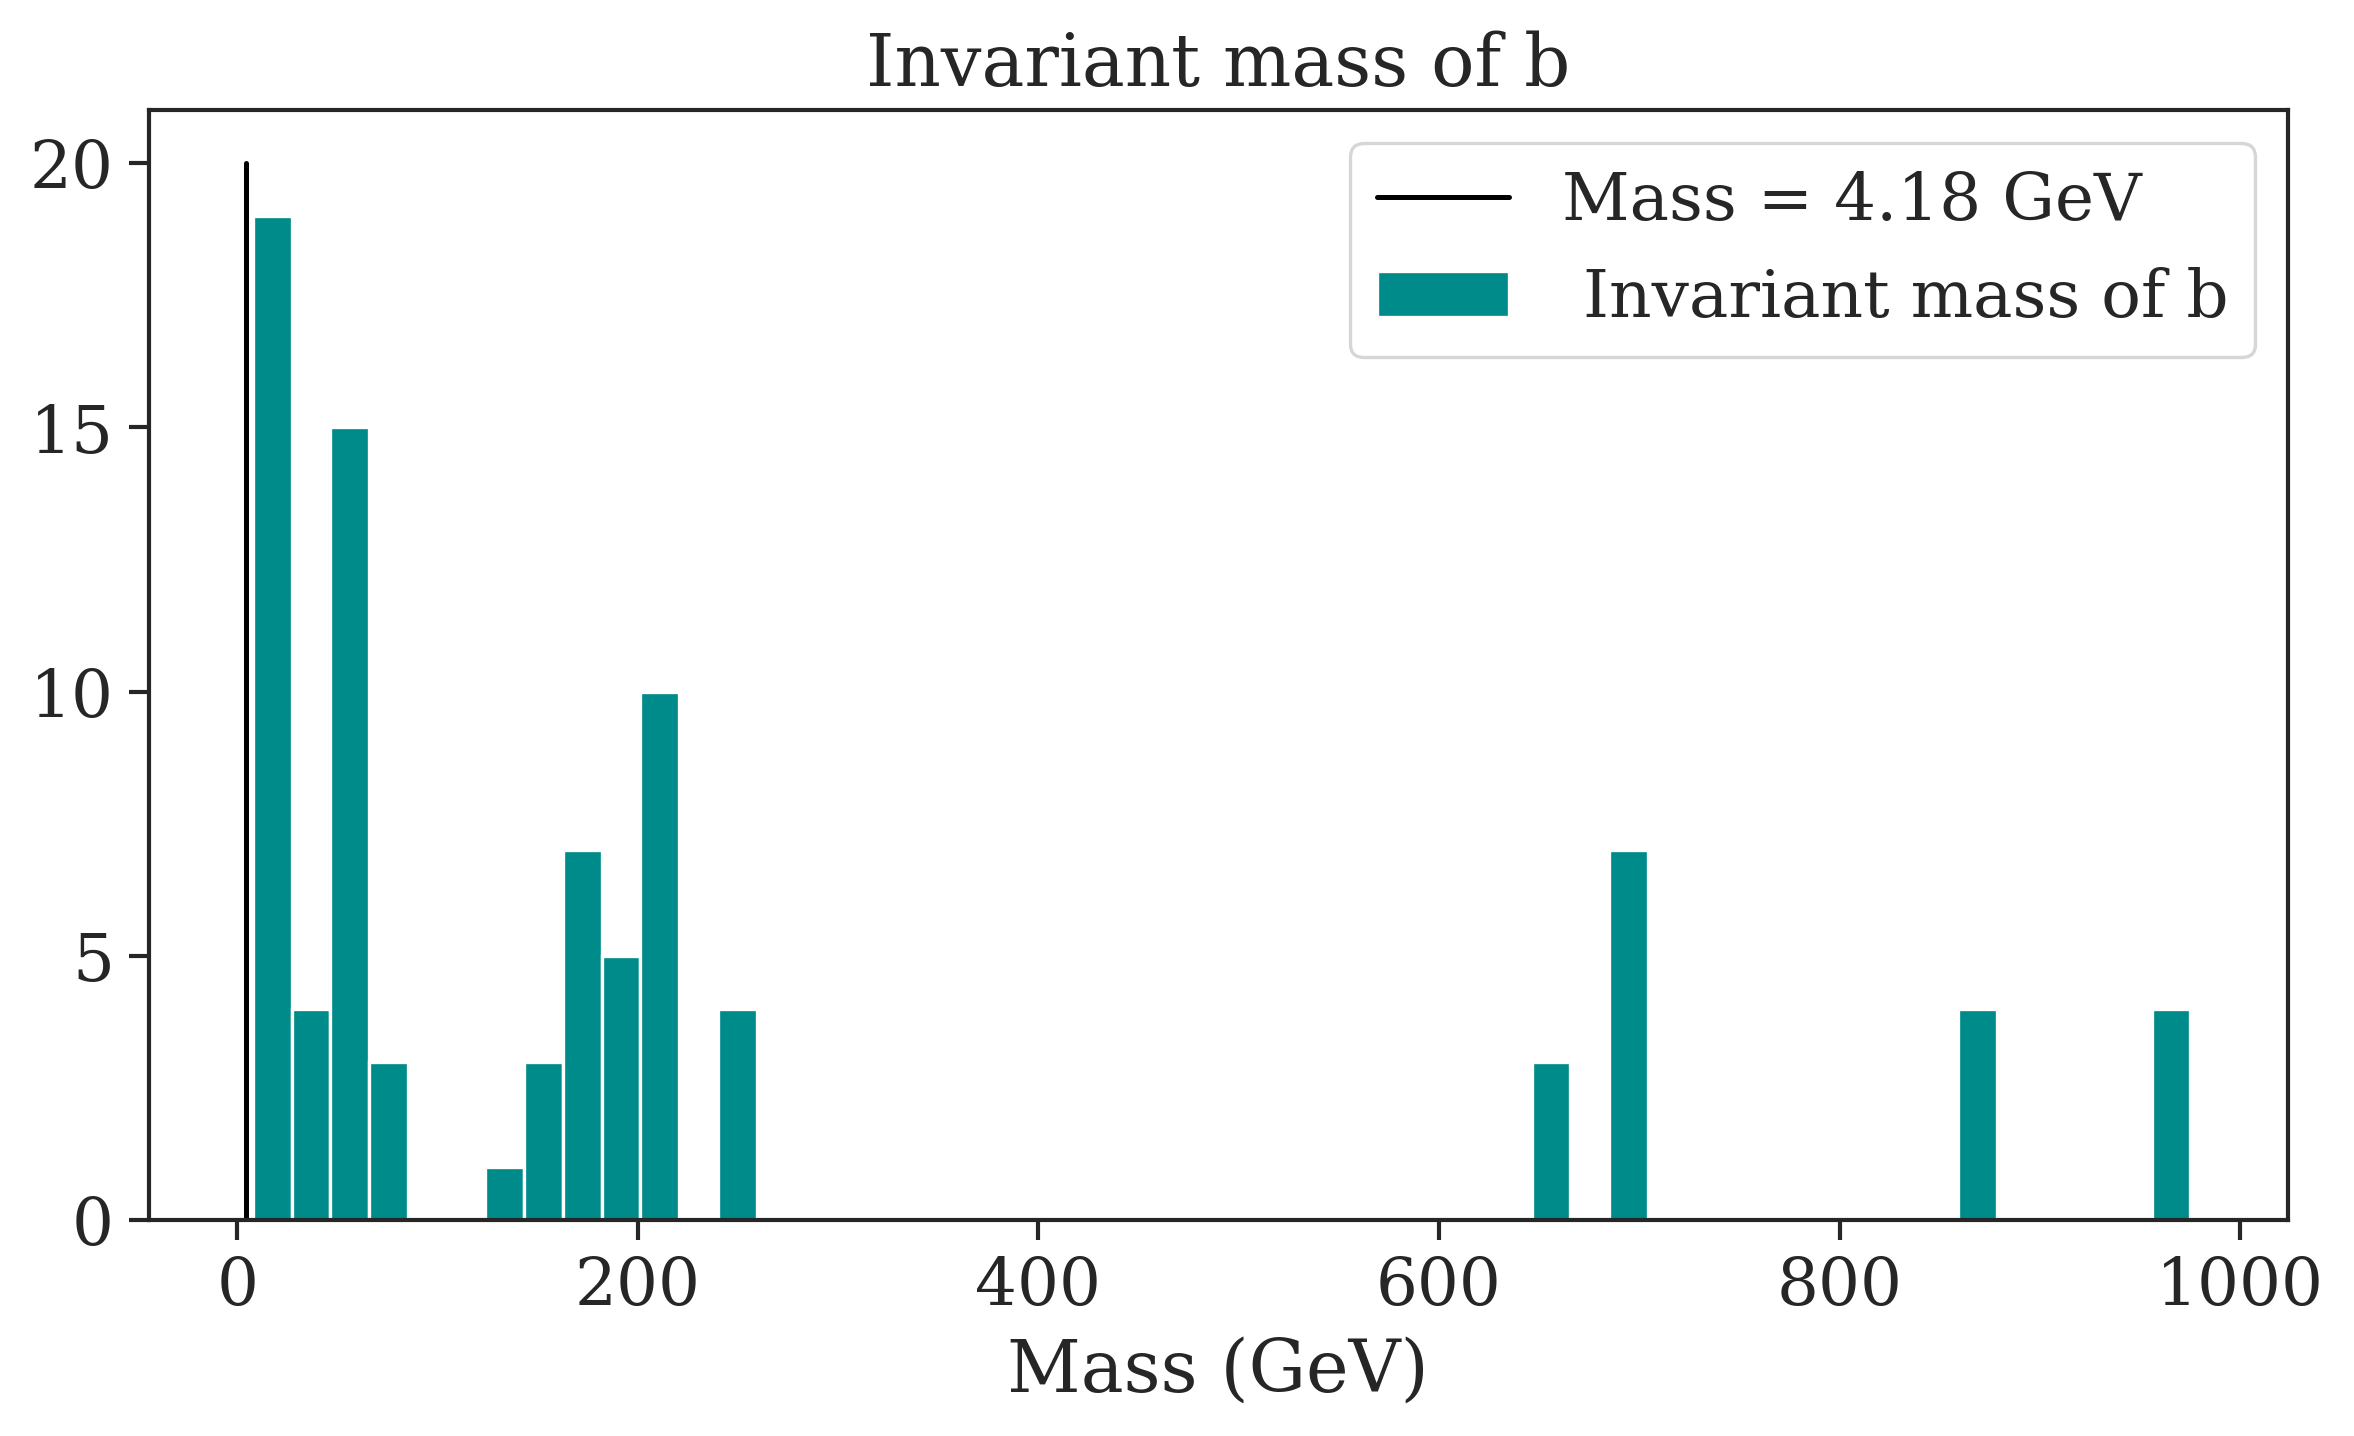

In [166]:
#Invariant mass
b_mass = invariant_mass('pp2ttbar_out.lhe',5)
b_mass = b_mass + invariant_mass('pp2ttbar_out.lhe',-5)
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(b_mass, bins = 50, color = 'darkcyan', label = r' Invariant mass of b')
plt.plot([4.18,4.18],[0,20], color = 'black', label = r'Mass = 4.18 GeV')

plt.xlabel(r'Mass (GeV)')
plt.title(r'Invariant mass of b')
plt.legend()
plt.show()